In [80]:
import sys
sys.path.insert(0, '../')

In [96]:
from skimage import io
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
# read input image
img = io.imread("../data/003_0.bmp")

# reshape the pixels matrix
pixels = np.reshape(img, (img.shape[0] * img.shape[1], img.shape[2])) / 255

max_iter = 100
q_error = []
iter_x = []

# SOM initialization and training
print("training...")
som = MiniSom(3, 3, img.shape[2], sigma=2.5,
             learning_rate=1., neighborhood_function='mexican_hat') # 3x3 = 9 final colors
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train_random(pixels, 100, verbose=True)

# just for checking quantization error
'''
for i in range(max_iter):
    percent = 100*(i+1)/max_iter
    rand_i = np.random.randint(len(pixels))
    som.update(pixels[rand_i], som.winner(pixels[rand_i]), i, max_iter)
    error = som.quantization_error(pixels)
    q_error.append(error)
    iter_x.append(i)
    sys.stdout.write(f'\riteration={i:2d} status={percent:0.2f}% error={error}')
    
plt.plot(iter_x, q_error)
plt.ylabel('quantization error')
plt.xlabel('iteration index')
'''

training...
 [ 100 / 100 ] 100% - 0.00035 it/s - quantization error: 0.2158325511127925


"\nfor i in range(max_iter):\n    percent = 100*(i+1)/max_iter\n    rand_i = np.random.randint(len(pixels))\n    som.update(pixels[rand_i], som.winner(pixels[rand_i]), i, max_iter)\n    error = som.quantization_error(pixels)\n    q_error.append(error)\n    iter_x.append(i)\n    sys.stdout.write(f'\riteration={i:2d} status={percent:0.2f}% error={error}')\n    \nplt.plot(iter_x, q_error)\nplt.ylabel('quantization error')\nplt.xlabel('iteration index')\n"

In [98]:
print('quantization...')
qnt = som.quantization(pixels)  # quantize each pixels of the image
print('building new image...')
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, dims=(img.shape[0], img.shape[1]))] = q
print('done.')

quantization...
building new image...


/usr/local/anaconda3/envs/fishClassifier/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  


done.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


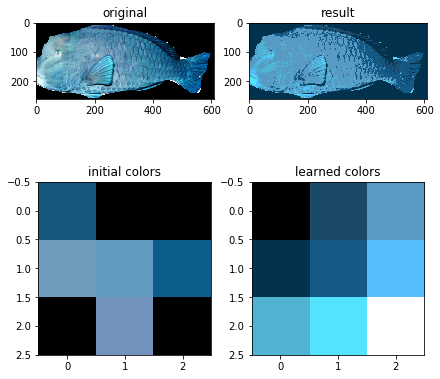

In [99]:
# show the result
plt.figure(figsize=(7, 7))
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(img)
plt.subplot(222)
plt.title('result')
plt.imshow(clustered)

plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.get_weights(), interpolation='none')

In [100]:
print(starting_weights)
print("after learning")
print(som.get_weights())

[[[0.09019608 0.34509804 0.49411765]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.43137255 0.60392157 0.7372549 ]
  [0.38039216 0.60784314 0.75294118]
  [0.04313725 0.36470588 0.54901961]]

 [[0.         0.         0.        ]
  [0.45098039 0.57254902 0.73333333]
  [0.         0.         0.        ]]]
after learning
[[[-2.92158328e-01 -3.60664209e-01 -3.46586114e-01]
  [ 1.06808628e-01  2.89727219e-01  4.17563764e-01]
  [ 3.43850915e-01  6.07303222e-01  7.66232326e-01]]

 [[ 9.96553526e-03  1.96692692e-01  3.05567496e-01]
  [ 8.03525049e-02  3.54952972e-01  5.26510158e-01]
  [ 3.33092397e-01  7.45557371e-01  9.89290197e-01]]

 [[ 3.20315643e-01  7.05715913e-01  8.25008391e-01]
  [ 3.29827127e-01  8.90592312e-01  1.11826742e+00]
  [ 4.84155648e+00  8.75531625e+00  1.00609164e+01]]]
